In [1]:
import numpy as np

u = np.array([[-0.21483724,  0.88723069,  0.40824829],
              [-0.52058739,  0.24964395, -0.81649658],
              [-0.82633754, -0.38794278,  0.40824829]])
s = np.array([16.84810335261421, 1.06836951455471, 0])
vt = np.array([[-0.47967118, -0.57236779, -0.66506441],
               [-0.77669099, -0.07568647,  0.62531805],
               [-0.40824829,  0.81649658, -0.40824829]])

In [2]:
A = (u*s).dot(vt)
np.round(A, 2)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

# Part 2

In [6]:
A = np.array([[4, 1, 7],
              [1, 4, 3],
              [7, 3, 4]])

v1 = np.array([0.68777769, 0.4381872, 0.69928217]).reshape(-1,1)
v2 = np.array([-0.1017017, -0.77186858, 0.29665168]).reshape(-1,1)
v3 = np.array([0.6627402, 0.20526185, -0.72016873]).reshape(-1,1)
v4 = np.array([0.89036881, -0.78460023, 0.30786775]).reshape(-1,1)

A.dot(v3) / v3

array([[-3.29685518],
       [-3.29685516],
       [-3.29685521]])

# Part 3

In [7]:
import numpy as np
import pandas as pd

rows = [['M. Dupé', 1, 25, 'Right', 8.0, 900.0],
       ['N. Fernández', 26, 18, 'Right', 1.0, 450.0],
       ['P. Kalambayi', 30, 18, 'Right', 1.0, 130.0],
       ['P. McNair', 17, 23, 'Right', 22.0, 2300.0],
       ['G. Bojanich', 23, 33, 'Right', 6.0, 425.0],
       ['A. Kofler', 31, 31, 'Right', 3.0, 325.0],
       ['N. Lavanchy', 14, 24, 'Right', 3.0, 600.0],
       ['O. Al Khalaf', 8, 21, 'Right', 3.0, 240.0],
       ['J. Sills', 21, 31, 'Right', 7.0, 600.0],
       ['B. Fox', 12, 20, 'Right', 1.0, 230.0],
       ['S. Smith', 9, 20, 'Left', 4.0, 450.0],
       ['E. Ocansey', 28, 20, 'Left', 5.0, 1600.0],
       ['F. Kostić', 10, 25, 'Left', 16.0, 10500.0],
       ['M. Ullmann', 13, 22, 'Left', 3.0, 1000.0],
       ['R. Taylor', 9, 30, 'Left', 4.0, 625.0],
       ['N. Vikonis', 34, 34, 'Left', 7.0, 2700.0],
       ['J. Aguirre', 29, 21, 'Left', 1.0, 575.0],
       ['J. Konings', 25, 20, 'Left', 1.0, 500.0],
       ['J. Raitala', 22, 29, 'Left', 3.0, 700.0],
       ['A. Taylor', 3, 31, 'Left', 3.0, 425.0]]
df = pd.DataFrame.from_records(rows, columns=["Name", "JerseyNumber", "Age", "PreferredFoot", "Wage", "Value"])
df["PreferredFootInt"] = (df["PreferredFoot"] == "Right").astype(int)
df = df[["JerseyNumber", "Age", "Wage", "Value", "PreferredFootInt"]]
df

,JerseyNumber,Age,Wage,Value,PreferredFootInt
0,1,25,8.0,900.0,1
1,26,18,1.0,450.0,1
2,30,18,1.0,130.0,1
3,17,23,22.0,2300.0,1
4,23,33,6.0,425.0,1
5,31,31,3.0,325.0,1
6,14,24,3.0,600.0,1
7,8,21,3.0,240.0,1
8,21,31,7.0,600.0,1
9,12,20,1.0,230.0,1


In [8]:
_,s,_ = np.linalg.svd(df)
s = np.array(sorted(np.abs(s), reverse=True))
s.cumsum() / s.sum()

array([0.98439685, 0.99521466, 0.99836246, 0.999822  , 1.        ])

# Part 4

In [9]:
import numpy as np
import pandas as pd

x = np.random.uniform(0,100,size=50) # hidden
y = 20 - x # want to predict this
x1 = 2*x
x2 = 10-3*x
x3 = 20+x
df = pd.DataFrame({"x1":x1, "x2":x2, "x3":x3, "y":y})
noise = np.random.normal(scale=10, size=df.shape)
df += noise
df.head()

,x1,x2,x3,y
0,192.402604,-256.936380,126.687448,-72.399906
1,1.282851,21.867371,19.099045,1.790768
2,33.859104,-35.780793,32.326489,-7.271034
3,53.831577,-93.176291,42.597560,-4.585470
4,96.581211,-126.337018,66.893196,-37.887618


In [10]:
from sklearn.decomposition import PCA
pca = PCA(1)
df["pc1"] = pca.fit_transform(df[['x1', 'x2', 'x3']])
df.head()

,x1,x2,x3,y,pc1
0,192.402604,-256.936380,126.687448,-72.399906,-148.569676
1,1.282851,21.867371,19.099045,1.790768,205.978906
2,33.859104,-35.780793,32.326489,-7.271034,138.904157
3,53.831577,-93.176291,42.597560,-4.585470,79.388833
4,96.581211,-126.337018,66.893196,-37.887618,23.525396


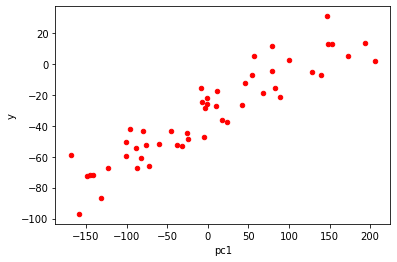

In [11]:
df.plot.scatter(x="pc1", y="y", color="red")

In [12]:
pca.explained_variance_ratio_

array([0.97787996])